In [77]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('/Users/PJizzle/Code/Data Mining Project/vgsales.csv')

In [79]:
df = df.drop('NA_Sales', axis=1)

In [80]:
df = df.drop('EU_Sales', axis=1)

In [81]:
df = df.drop('JP_Sales', axis=1)

In [82]:
df

,Year,Genre,Global_Sales,Rank
0,2006.0,Sports,82.74,1
1,1985.0,Platform,40.24,2
2,2008.0,Racing,35.82,3
3,2009.0,Sports,33.00,4
4,1996.0,Role-Playing,31.37,5
5,1989.0,Puzzle,30.26,6
6,2006.0,Platform,30.01,7
7,2006.0,Misc,29.02,8
8,2009.0,Platform,28.62,9
9,1984.0,Shooter,28.31,10


In [83]:
classes = pd.Series(df['Genre'].unique(), name='Genre')

In [84]:
classes

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [85]:
classes=classes.to_frame()

In [86]:
type(classes)

pandas.core.frame.DataFrame

In [87]:
classes['Sports'] = (classes['Genre'] == 'Sports') + 0
classes['Platform'] = (classes['Genre'] == 'Platform') + 0
classes['Racing'] = (classes['Genre'] == 'Racing') + 0
classes['Role-Playing'] = (classes['Genre'] == 'Role-Playing') + 0
classes['Puzzle'] = (classes['Genre'] == 'Puzzle') + 0
classes['Misc'] = (classes['Genre'] == 'Misc') + 0
classes['Shooter'] = (classes['Genre'] == 'Shooter') + 0
classes['Simulation'] = (classes['Genre'] == 'Simulation') + 0
classes['Action'] = (classes['Genre'] == 'Action') + 0
classes['Fighting'] = (classes['Genre'] == 'Fighting') + 0
classes['Adventure'] = (classes['Genre'] == 'Adventure') + 0
classes['Strategy'] = (classes['Genre'] == 'Strategy') + 0

In [88]:
df = df.dropna()

In [89]:
df.isnull().values.any()

False

In [90]:
df2 = pd.merge(df, classes)

In [91]:
df2
len(df2)

16327

In [92]:
df_fighting = (df2['Year'] == 2014) & (df2['Genre'] == 'Sports')
fighting2015 = df2[df_fighting]
type(fighting2015)

pandas.core.frame.DataFrame

In [93]:
fighting2015 = fighting2015.reset_index()


In [94]:
fighting2015.index = fighting2015.index + 1
fighting2015 = fighting2015.reset_index()
fighting2015 = fighting2015.drop('index', axis=1)
fighting2015.head()

,level_0,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,2014.0,Sports,6.59,125,1,0,0,0,0,0,0,0,0,0,0,0
1,2,2014.0,Sports,4.82,220,1,0,0,0,0,0,0,0,0,0,0,0
2,3,2014.0,Sports,3.11,450,1,0,0,0,0,0,0,0,0,0,0,0
3,4,2014.0,Sports,2.38,663,1,0,0,0,0,0,0,0,0,0,0,0
4,5,2014.0,Sports,2.15,762,1,0,0,0,0,0,0,0,0,0,0,0


In [95]:
X = fighting2015[['level_0']]
X.shape

(55, 1)

In [96]:
df_NoYear = (df2['Year'] == 2007) | (df2['Genre'] == 'Sports')
df_New = df2[df_NoYear]
type(df_New)


pandas.core.frame.DataFrame

In [97]:
y = fighting2015['Global_Sales']

In [98]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
x2_train, x2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X,y)

In [99]:
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [100]:
reg.fit(np.log(1+x_train), np.log(y_train))
reg2.fit(np.log(1+x2_train), np.log(y2_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
y_pred = np.exp(reg.predict(np.log(1+x_test)))
y2_pred = np.exp(reg2.predict(np.log(1+x2_test)))

In [102]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("variance score: %.2f" % r2_score(y2_test, y2_pred))

Variance score: -0.42
Mean squared error: 1.99
variance score: 0.73


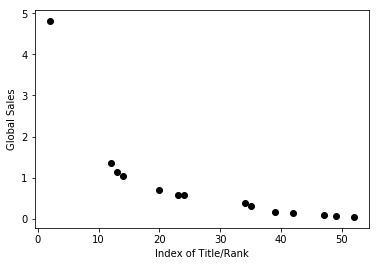

In [103]:
plt.scatter(x_test, y_test,  color='black')
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.show()

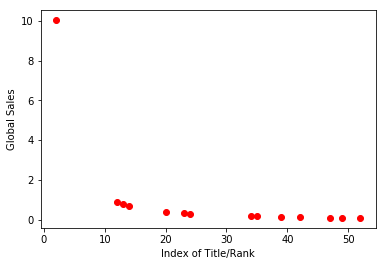

In [104]:
plt.plot(x_test, y_pred,'o', color='red', linewidth=3)
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.show()

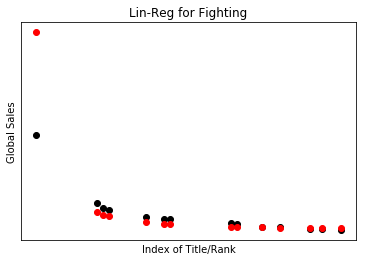

In [105]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, 'o', color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.title('Lin-Reg for Fighting')
plt.show()

In [106]:
reg.coef_

array([-1.64427702])

In [107]:
reg.intercept_

4.1117564652401288

In [108]:
F = ((((r2_score(y2_test, y2_pred))-(r2_score(y_test, y_pred)))/1)/((r2_score(y_test, y_pred))/16000))
alpha = 0.05
p_value = stats.f.cdf(F, 1, 16000)
print(p_value)

0.0


In [109]:
reg2.intercept_

3.807783766121811

In [110]:
reg2.coef_

array([-1.52798033])

In [111]:
co = np.array([-2.2, -1.44, -1.89, -1.55, -1.34, -1.53, -1.41, -1.44, -1.46, -1.51, -1.30, -1.43, -1.12, -1.29, -1.18, -1.23, -1.16])
co_year = np.array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999])


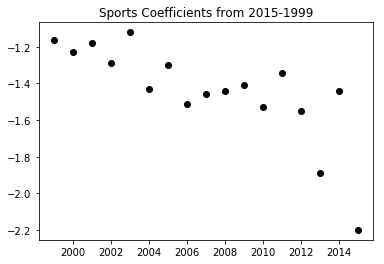

In [112]:
plt.plot(co_year, co, 'o', color='black')
plt.title('Sports Coefficients from 2015-1999')
plt.show()

In [113]:
slo = np.array([2.94, 3.75, 3.62, 3.99, 3.40, 3.59, 4.48, 4.63, 4.44, 4.23, 3.53, 4.00, 3.0 , 3.66, 3.10, 2.98, 2.51])
slo_year = np.array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999])

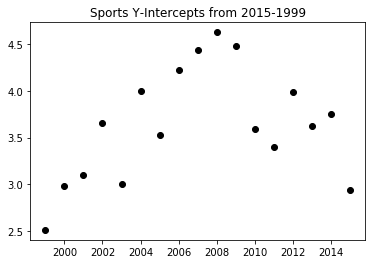

In [114]:
plt.plot(slo_year, slo, 'o', color='black')
plt.title('Sports Y-Intercepts from 2015-1999')
plt.show()